#**Pressure Lab** - _Pilot Test_
---


## Overview
The goal of this lab is to use the pressure sensor on a phone to measure the hydrostatic pressure at the bottom of a pot of water and to compare it to the pressure that your lungs can exert.  The hydrostatic pressure will also be compared to theory.

##Approach

![alt text style="width:200px"](https://drive.google.com/uc?id=10HIayWdDDpoVsYc28X09Ij8X2yAs1LYI ) 

Figure 1.  Experimental Setup.

##Data
The following data was collected by the phone as it was twice dunked to the bottom of the pot.

Let's first upload the data.  We have exported the data in a csv (comma, decimal point) format, which we can download to our computer drive or directly to a 'Data' folder in a google drive.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Raw Data.csv to Raw Data.csv
User uploaded file "Raw Data.csv" with length 56670 bytes


In [0]:
import pandas as pd

In [0]:
#Store as a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['Raw Data.csv']))


In [0]:
df

,Time (s),Pressure (hPa)
0,0.000000,1011.975525
1,0.038422,1011.975525
2,0.076874,1011.975525
3,0.116577,1011.975525
4,0.153809,1011.971497
...,...,...
2017,77.557944,1026.674072
2018,77.596427,1026.674072
2019,77.634849,1026.674072
2020,77.673301,1024.860474


Now that we have the data loaded in as a dataframe, let's plot the pressure as a function of time. First we'll convert it to an NumPy array

In [0]:
tp = df.to_numpy()
time = tp[:,0]
pressure = tp[:,1]

Let's plot the data

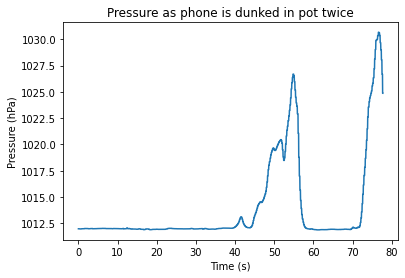

In [0]:
import matplotlib.pyplot as plt
plt.plot(time,pressure)
plt.xlabel("Time (s)")
plt.ylabel("Pressure (hPa)")
plt.title("Pressure as phone is dunked in pot twice")
plt.show()

Note that the units of pressure here are measured in hPa = 100 Pa = $10^{-3}$ bar.  Therefore, in bar, the atmospheric pressure can be approximated by the first value divided by 1000.

In [0]:
pressure[0]/1000

1.011975525

Now let's calculate and plot the gauge pressure in Pa

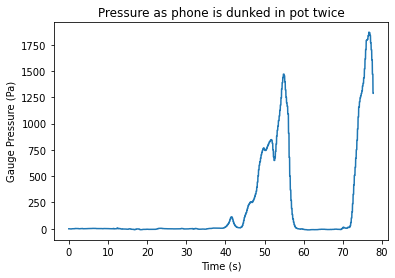

In [0]:
Pg = (pressure-pressure[0])*100

plt.plot(time,Pg)
plt.xlabel("Time (s)")
plt.ylabel("Gauge Pressure (Pa)")
plt.title("Pressure as phone is dunked in pot twice")
plt.show()

What would we expect the pressure to be if the phone was submerged to a depth of 150 mm of water?

$P_{model}-P_{atm} = \rho g h$

In [0]:
rho = 1000 #kg/m^3
g = 9.8 #m/s^2
h = 0.17 #m
P_model = rho*g*h #Pa
P_model

1666.0000000000002